In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
cfdata = pd.read_csv("D:\IIT-H\IVth Semester\CS6360 - Advanced Methods in Machine Learning\Project\creditcard.csv")
cfdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


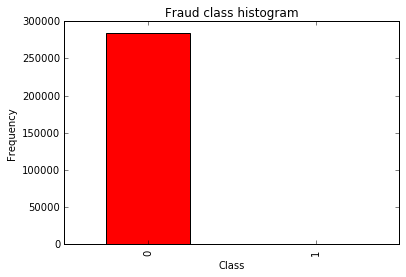

In [3]:
count_of_classes = pd.value_counts(cfdata['Class'], sort = True).sort_index()
count_of_classes.plot(kind = 'bar',color='red')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [4]:
from sklearn.preprocessing import StandardScaler

cfdata['Normalized_Amount'] = StandardScaler().fit_transform(cfdata['Amount'].reshape(-1, 1))
cfdata = cfdata.drop(['Time','Amount'],axis=1)
cfdata.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X_values = cfdata.ix[:, cfdata.columns != 'Class']
Y_value = cfdata.ix[:, cfdata.columns == 'Class']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [6]:
from imblearn.over_sampling import     SMOTE 

In [7]:
smote = SMOTE(kind="regular", random_state=42)

In [8]:
smote

SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=42, ratio='auto', svm_estimator=None)

In [9]:
from sklearn.cross_validation import train_test_split

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_values,Y_value,test_size = 0.3, random_state = 0)

In [11]:
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [13]:
def determine_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    c_param_values = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_values),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_values

    i = 0
    for c_param in c_param_values:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accuracy = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with the given C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred)
            recall_accuracy.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[i,'Mean recall score'] = np.mean(recall_accuracy)
        i += 1
        print('')
        print('Mean recall score ', np.mean(recall_accuracy))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [14]:
best_c = determine_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.492537313433
Iteration  2 : recall score =  0.602739726027
Iteration  3 : recall score =  0.683333333333
Iteration  4 : recall score =  0.569230769231
Iteration  5 : recall score =  0.45

Mean recall score  0.559568228405

-------------------------------------------
C parameter:  0.1
-------------------------------------------



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration  1 : recall score =  0.567164179104
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.683333333333
Iteration  4 : recall score =  0.584615384615
Iteration  5 : recall score =  0.525

Mean recall score  0.595310250644

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.55223880597
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.716666666667
Iteration  4 : recall score =  0.615384615385
Iteration  5 : recall score =  0.5625

Mean recall score  0.612645688837

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall score =  0.55223880597
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.733333333333
Iteration  4 : recall score =  0.615384615385
Iteration  5 : recall score =  0.575

Mean recall score  0.61847902217

--------------------

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.619047619048


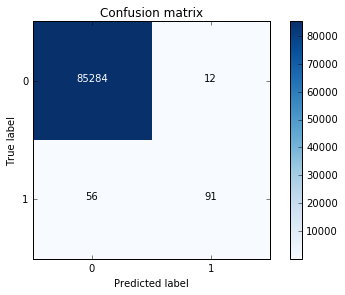

In [16]:

lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_test = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_test)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.734693877551
Recall metric in the testing dataset:  0.619047619048
Recall metric in the testing dataset:  0.578231292517
Recall metric in the testing dataset:  0.56462585034
Recall metric in the testing dataset:  0.551020408163
Recall metric in the testing dataset:  0.544217687075
Recall metric in the testing dataset:  0.503401360544
Recall metric in the testing dataset:  0.455782312925
Recall metric in the testing dataset:  0.380952380952


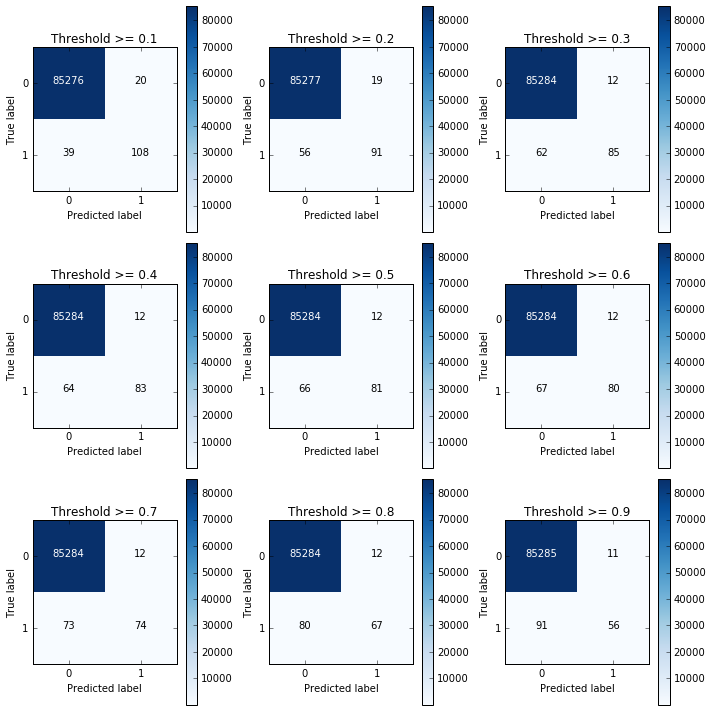

In [17]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_test_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_test_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

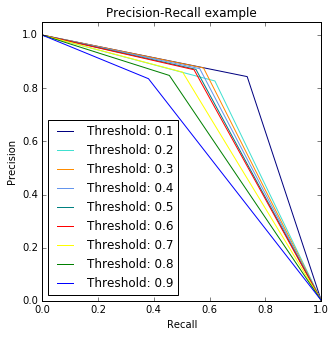

In [18]:
from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [19]:
from imblearn.over_sampling import     SMOTE 

In [20]:
smote = SMOTE(kind="regular", random_state=42)

In [21]:
X_oversample, y_oversample = smote.fit_sample(X_values, Y_value)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
y_value=np.array(Y_value.Class)

In [23]:
y_value

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
len(y_value)

284807

In [25]:
X_oversample, y_oversample = smote.fit_sample(X_values, y_value)

In [26]:
Y_oversample=pd.DataFrame(y_oversample)

In [27]:
X_oversample=pd.DataFrame(X_oversample)

In [28]:
X_oversamp_train, X_oversamp_test, y_oversamp_train, y_oversamp_test = train_test_split(X_oversample,Y_oversample,test_size = 0.3, random_state = 0)

In [29]:
print("Number transactions train dataset: ", len(X_oversamp_train))
print("Number transactions test dataset: ", len(X_oversamp_test))
print("Total number of transactions: ", len(X_oversamp_train)+len(X_oversamp_test))

Number transactions train dataset:  398041
Number transactions test dataset:  170589
Total number of transactions:  568630


In [30]:
best_c_oversampl = determine_Kfold_scores(X_oversamp_train,y_oversamp_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.91391862955
Iteration  2 : recall score =  0.910053176743
Iteration  3 : recall score =  0.912874903069
Iteration  4 : recall score =  0.911040088582
Iteration  5 : recall score =  0.913413715147

Mean recall score  0.912260102618

-------------------------------------------
C parameter:  0.1
-------------------------------------------



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration  1 : recall score =  0.917495906285
Iteration  2 : recall score =  0.914413165654
Iteration  3 : recall score =  0.914976111264
Iteration  4 : recall score =  0.913632131263
Iteration  5 : recall score =  0.917206731977

Mean recall score  0.915544809289

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.91789897972
Iteration  2 : recall score =  0.914665188135
Iteration  3 : recall score =  0.916151787278
Iteration  4 : recall score =  0.914764577094
Iteration  5 : recall score =  0.917282089927

Mean recall score  0.916152524431

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall score =  0.91792417181
Iteration  2 : recall score =  0.914715592631
Iteration  3 : recall score =  0.916176801661
Iteration  4 : recall score =  0.914940735335
Iteration  5 : recall score =  0.917282089927

Mean recall score  0.9162078

Recall metric in the oversampled testing dataset:  0.917604223984


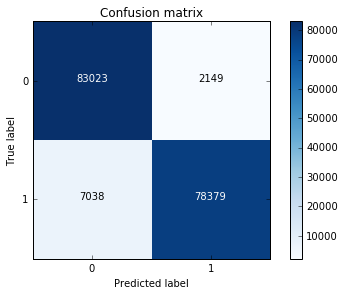

In [31]:
lr = LogisticRegression(C = best_c_oversampl, penalty = 'l1')
lr.fit(X_oversamp_train,y_oversamp_train.values.ravel())
y_pred_oversamp_test = lr.predict(X_oversamp_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_oversamp_test,y_pred_oversamp_test)
np.set_printoptions(precision=2)

print("Recall metric in the oversampled testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the actual testing dataset:  0.931972789116


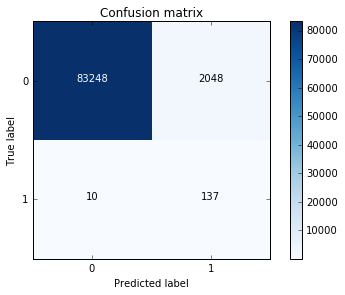

In [32]:
lr = LogisticRegression(C = best_c_oversampl, penalty = 'l1')
lr.fit(X_oversamp_train,y_oversamp_train.values.ravel())
y_pred_actual_test = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_actual_test)
np.set_printoptions(precision=2)

print("Recall metric in the actual testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

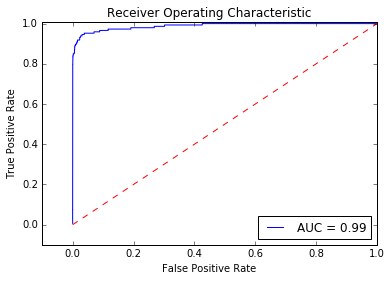

In [33]:
# ROC CURVE
lr = LogisticRegression(C = best_c_oversampl, penalty = 'l1')
y_pred_actual_score = lr.fit(X_oversamp_train,y_oversamp_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_actual_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Recall metric in the testing dataset:  0.979591836735
Recall metric in the testing dataset:  0.965986394558
Recall metric in the testing dataset:  0.952380952381
Recall metric in the testing dataset:  0.945578231293
Recall metric in the testing dataset:  0.918367346939
Recall metric in the testing dataset:  0.91156462585
Recall metric in the testing dataset:  0.897959183673
Recall metric in the testing dataset:  0.891156462585
Recall metric in the testing dataset:  0.857142857143


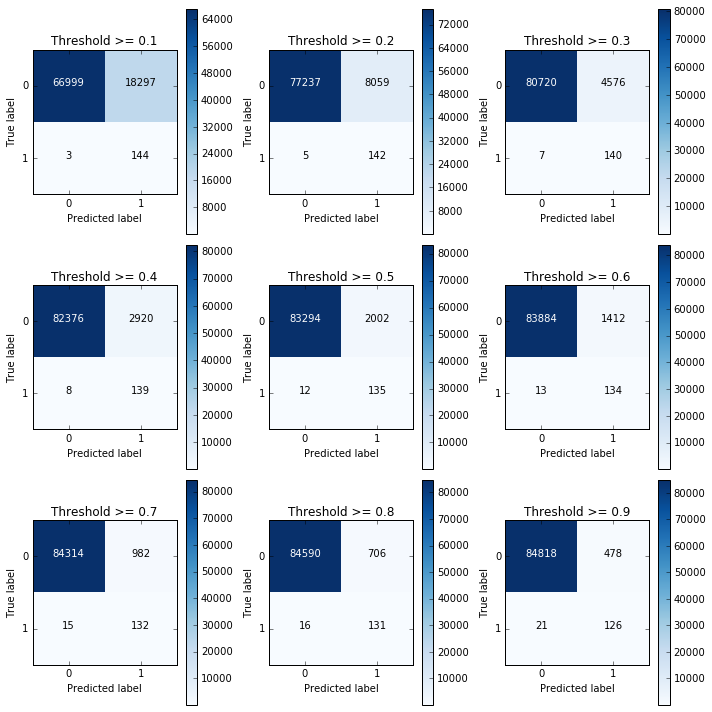

In [34]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_oversamp_train,y_oversamp_train.values.ravel())
y_pred_actual_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_actual_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

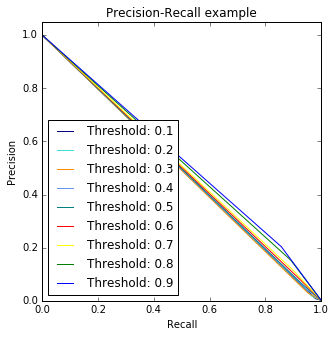

In [35]:
from itertools import cycle

lr = LogisticRegression(C = best_c_oversampl, penalty = 'l1')
lr.fit(X_oversamp_train,y_oversamp_train.values.ravel())
y_pred_actual_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_actual_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [36]:
v_features = cfdata.ix[:,0:29].columns

In [37]:
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

IndexError: index out of range

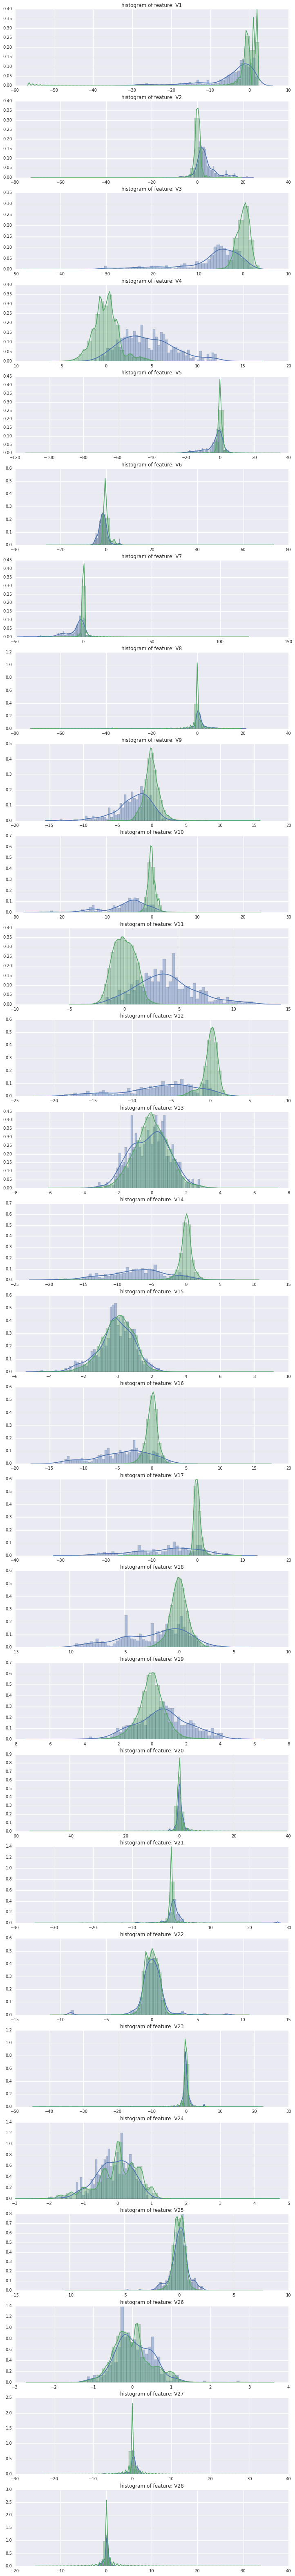

In [38]:
import seaborn as sns
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(cfdata[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(cfdata[cn][cfdata.Class == 1], bins=50)
    sns.distplot(cfdata[cn][cfdata.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [40]:
#Drop all of the features that have very similar distributions between the two types of transactions.
cfdata_new = cfdata.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)



In [41]:
X_values_reduced = cfdata_new.ix[:, cfdata_new.columns != 'Class']
Y_value_reduced = cfdata_new.ix[:, cfdata_new.columns == 'Class']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [42]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_values_reduced,Y_value_reduced,test_size = 0.3, random_state = 0)

In [43]:
X_oversample_reduced, y_oversample_reduced = smote.fit_sample(X_values_reduced, Y_value_reduced)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
y_value_reduced=np.array(Y_value_reduced.Class)

In [45]:
y_value_reduced

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
X_oversample_reduced, y_oversample_reduced = smote.fit_sample(X_values_reduced, y_value_reduced)

In [47]:
Y_oversample_reduced=pd.DataFrame(y_oversample_reduced)

In [48]:
X_oversample_reduced=pd.DataFrame(X_oversample_reduced)

In [49]:
X_oversamp_train_red, X_oversamp_test_red, y_oversamp_train_red, y_oversamp_test_red = train_test_split(X_oversample_reduced,Y_oversample_reduced,test_size = 0.3, random_state = 0)

In [50]:
print("Number transactions reduced train dataset: ", len(X_oversamp_train_red))
print("Number transactions reduced test dataset: ", len(X_oversamp_test_red))
print("Total number of transactions: ", len(X_oversamp_train_red)+len(X_oversamp_test_red))

Number transactions reduced train dataset:  398041
Number transactions reduced test dataset:  170589
Total number of transactions:  568630


In [51]:
best_c_oversampl_red = determine_Kfold_scores(X_oversamp_train_red,y_oversamp_train_red)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.902254692027
Iteration  2 : recall score =  0.897275636987
Iteration  3 : recall score =  0.900918027866
Iteration  4 : recall score =  0.899312982862
Iteration  5 : recall score =  0.90092941472

Mean recall score  0.900138150892

-------------------------------------------
C parameter:  0.1
-------------------------------------------



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Iteration  1 : recall score =  0.902431036654
Iteration  2 : recall score =  0.8977544797
Iteration  3 : recall score =  0.901218200465
Iteration  4 : recall score =  0.899866623047
Iteration  5 : recall score =  0.901431801055

Mean recall score  0.900540428184

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.902431036654
Iteration  2 : recall score =  0.897729277452
Iteration  3 : recall score =  0.901218200465
Iteration  4 : recall score =  0.899916953972
Iteration  5 : recall score =  0.901356443105

Mean recall score  0.90053038233

-------------------------------------------
C parameter:  10
-------------------------------------------

Iteration  1 : recall score =  0.902456228744
Iteration  2 : recall score =  0.897704075204
Iteration  3 : recall score =  0.901268229232
Iteration  4 : recall score =  0.899866623047
Iteration  5 : recall score =  0.901406681738

Mean recall score  0.90054036

Recall metric in the oversampled reduced features testing dataset:  0.902361356639


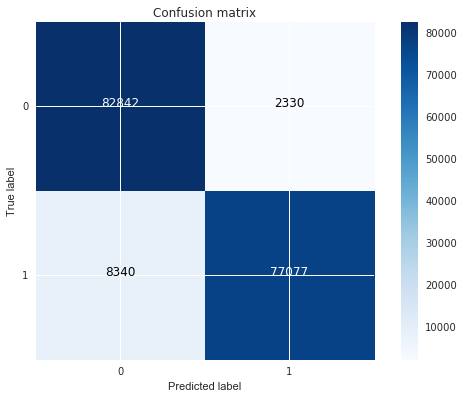

In [52]:
lr = LogisticRegression(C = best_c_oversampl_red, penalty = 'l1')
lr.fit(X_oversamp_train_red,y_oversamp_train.values.ravel())
y_pred_oversamp_test_red = lr.predict(X_oversamp_test_red.values)

# Compute confusion matrix
cnf_matrix_red = confusion_matrix(y_oversamp_test_red,y_pred_oversamp_test_red)
np.set_printoptions(precision=2)

print("Recall metric in the oversampled reduced features testing dataset: ", cnf_matrix_red[1,1]/(cnf_matrix_red[1,0]+cnf_matrix_red[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_red
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the actual testing dataset:  0.897959183673


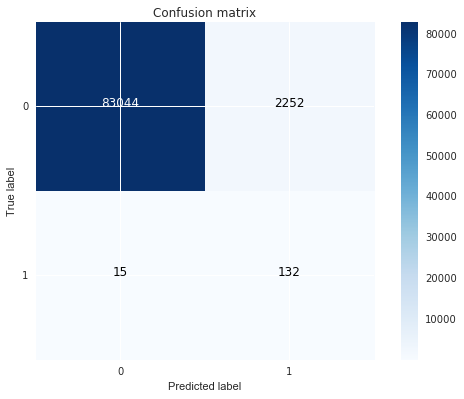

In [53]:
lr = LogisticRegression(C = best_c_oversampl_red, penalty = 'l1')
lr.fit(X_oversamp_train_red,y_oversamp_train_red.values.ravel())
y_pred_actual_test_red = lr.predict(X_test_red.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_red,y_pred_actual_test_red)
np.set_printoptions(precision=2)

print("Recall metric in the actual testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

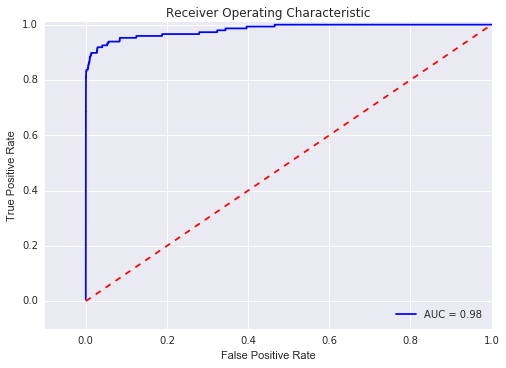

In [54]:
# ROC CURVE
lr = LogisticRegression(C = best_c_oversampl_red, penalty = 'l1')
y_pred_actual_score_red = lr.fit(X_oversamp_train_red,y_oversamp_train_red.values.ravel()).decision_function(X_test_red.values)

fpr, tpr, thresholds = roc_curve(y_test_red.values.ravel(),y_pred_actual_score_red)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

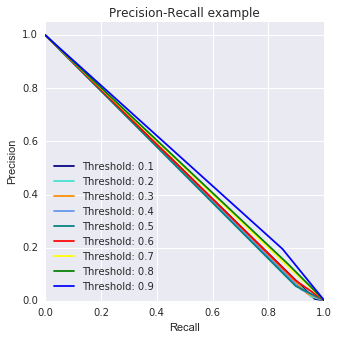

In [55]:
from itertools import cycle

lr = LogisticRegression(C = best_c_oversampl_red, penalty = 'l1')
lr.fit(X_oversamp_train_red,y_oversamp_train_red.values.ravel())
y_pred_actual_proba = lr.predict_proba(X_test_red.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_actual_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_red,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")